In [15]:
%matplotlib inline
import numpy
import scipy
import matplotlib.pyplot as plt
import pandas

## Simulating first-order systems
Using `scipy.signal`

In [16]:
def firstorder_simulate(A, B, initial=0.0, times=None):
    C = 1.0; D = 0.0 # unused, required by scipy.StateSpace
    system = scipy.signal.StateSpace(A, B, C, D)
    tt,YY = scipy.signal.step(system, initial, T=times)
    return tt, YY

## 2. Autonomous Underwater Vehicle


### 2.f
We will assume that `u = 500N` is constant.
Consider an initial velocity `0m/s`.

Sketch the velocity `v` from `t = 0s` to `t = 15s`
either by hand or using computer aid (calculator/Matlab)

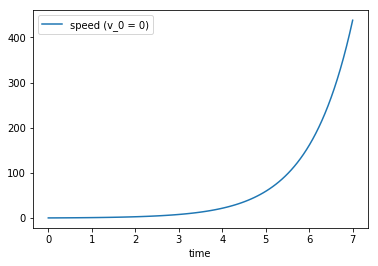

In [21]:
def uav_horizontal(m, k):
    A = 1.0
    B = 0.4
    return A, B

system = uav_horizontal(m=200.0, k=100.0)
t, V = firstorder_simulate(*system, initial=0.0)

df = pandas.DataFrame({'time': t, 'speed (v0 = 0)': V})
df.plot(x='time')

### (g)
Sketch the same response when `v_0 = 10m/s` and `v_0 = −5m/s`.

How are the stationary values in a first order system affected by the initial values?

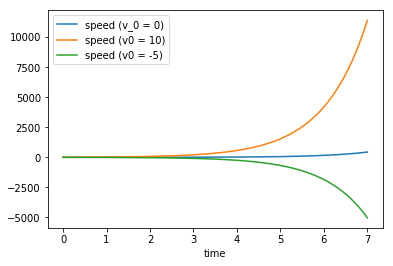

In [25]:
df['speed (v0 = 10)'] = firstorder_simulate(*system, initial=10.0, times=t)[1]
df['speed (v0 = -5)'] = firstorder_simulate(*system, initial=-5.0, times=t)[1]
df.plot(x='time')

### (j)
Assume once again that m = 200kg, k = 100kg/s , and v_0 = 0m/s 

Sketch the velocity of the AUV from t = 0s to t = 15s with u = 200N.

Then, at t = 15s, set u = 0N and sketch the velocity from t = 15s to t = 30s.
(remember to use the correct initial value at t = 15s).

In [27]:
t_0_15 = numpy.linspace(0, 15)
t_15_30 = numpy.linspace(0, 15)

Do you recall the figure from a common system found in electric circuits? Which one?

What physical property does the mass of the AUV correspond to in the electric circuit?
What does the input correspond to?

## 3. Heating plate
The heating plate is modeled as $ \dot T = {-k/c}T + 1/c(P+k T_{room}) $

Can be written on standard form 
$\dot T = a x + b$ with $a = -k/c$, $b = 1/c(P+kT_{room}) $ and $x = T$

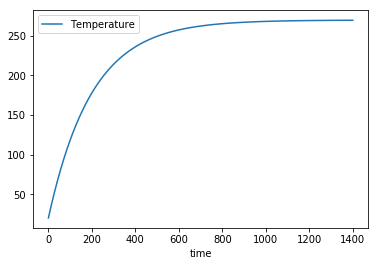

In [9]:
def cooking_plate(P, k, c, T_room):
    A = -k/c
    B = 1/c*(P+k*T_room)
    return A, B

system = cooking_plate(P=500,  k=2.0, c=400, T_room=20)
t, T = firstorder_simulate(*system, initial=20.0)

df = pandas.DataFrame({'time': t, 'Temperature': T})
df.plot(x='time')